In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#匯入資料
data = pd.read_csv('data/electricity.csv')

In [3]:
# 針對用電量設定類別
def get_consumption_category(wt):
    if wt < 200:
        return 1
    elif 200 < wt < 400:
        return 2
    elif 400 < wt < 600:
        return 3
    elif 600 < wt < 800:
        return 4
    elif 800 < wt < 1000:
        return 5
    elif 1000 < wt < 1200:
        return 6
    else:
        return 7

data["electricity_consumption_category"] = data["electricity_consumption"].map(get_consumption_category)

In [4]:
df = data[['temperature','pressure', 'windspeed', 'electricity_consumption_category']]
df.head()

,temperature,pressure,windspeed,electricity_consumption_category
0,-11.4,1003.0,571.910,2
1,-12.1,996.0,575.040,2
2,-12.9,1000.0,578.435,2
3,-11.4,995.0,582.580,2
4,-11.4,1005.0,586.600,2


In [5]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [6]:
# 分割數據集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [7]:
# 標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# 計算特徵值
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues : \n%s' % eigen_vals)


Eigenvalues : 
[1.79429993 0.27268489 0.93317694]


# Total and explained variance (without scikit-learn)

In [9]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

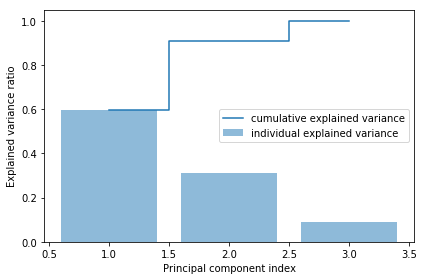

In [10]:
plt.bar(range(1, 4), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 4), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Feature transformation

In [11]:
# 列出（特徵值，特徵向量）tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# 將（特徵值，特徵向量）tuples從高到低排序
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [12]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('\nMatrix W:\n', w)


Matrix W:
 [[-0.67812685  0.20458604]
 [ 0.67999828 -0.18973699]
 [ 0.27883027  0.96028351]]


In [13]:
X_train_std[0].dot(w)

array([-1.28203607,  0.03483451])

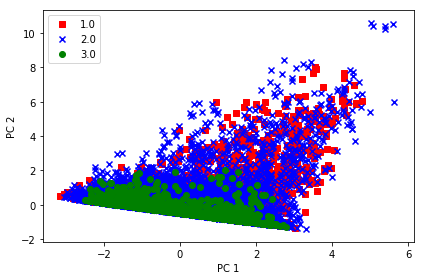

In [14]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Principal component analysis in scikit-learn

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.59806773, 0.31104221, 0.09089006])

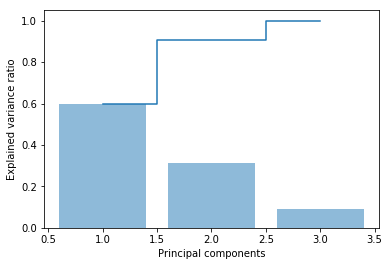

In [16]:
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()